# HEALTH SYMPTOM CHECKER
USER ENTERS THE SYMPTOMS AND THE SEVERITY OF EACH SYMPTOM AND THE MODEL RETURNS THE DISESASE DIAGNOSIS

In [14]:
pip install pandas

You should consider upgrading via the 'c:\Users\Namita Sathish\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [15]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [16]:
# -------------------------------------------
# 1. Load CSV Files
# -------------------------------------------


data = pd.read_csv("dataset.csv")
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data.replace("", np.nan, inplace=True)


severity_df = pd.read_csv("Symptom-severity.csv")
severity_df = severity_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# symptom weight dictionary
severity_mapping = {}
for _, row in severity_df.iterrows():

    symptom = row["Symptom"].lower().strip()
    try:
        weight = float(row["weight"])

    except ValueError:
        weight = 1.0 
    severity_mapping[symptom] = weight

# description dictionary
desc_df = pd.read_csv("symptom_Description.csv")
desc_df = desc_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
description_dict = {}

for _, row in desc_df.iterrows():
    disease = row['Disease']
    description = row['Description']
    description_dict[disease] = description

# recommendation dictionary
precaution_df = pd.read_csv("symptom_precaution.csv")
precaution_df = precaution_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
precaution_dict = {}

for _, row in precaution_df.iterrows():
    disease = row['Disease']
    precautions = [row[col] for col in precaution_df.columns if col != 'Disease' and pd.notnull(row[col])]
    precaution_dict[disease] = precautions

C:\Users\Namita Sathish\AppData\Local\Temp\ipykernel_9772\1422404296.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\Namita Sathish\AppData\Local\Temp\ipykernel_9772\1422404296.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  severity_df = severity_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\Namita Sathish\AppData\Local\Temp\ipykernel_9772\1422404296.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_df = desc_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\Namita Sathish\AppData\Local\Temp\ipykernel_9772\1422404296.py:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  precaution_df = precaution_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [17]:
# ---------------------------------------------------
# 2. Preparing the data 
# ---------------------------------------------------

symptom_columns = [col for col in data.columns if col.lower().startswith("symptom")]


#unique values
symptom_set = set()
for col in symptom_columns:
    symptoms_in_col = data[col].dropna().unique()
    for symptom in symptoms_in_col:
        symptom_set.add(symptom.strip())

#sort
symptom_list = sorted(list(symptom_set))
print("List of all possible symptoms in our dataset:")
print(symptom_list)

# feature vector
def create_feature_vector(row):

    features = [0] * len(symptom_list) #set len
    for col in symptom_columns:
        symptom = row[col]
        if pd.isnull(symptom):
            continue
        symptom = symptom.strip()
        
        weight = severity_mapping.get(symptom.lower(), 1) #get weight else 1
    
        try:
            idx = symptom_list.index(symptom)
            features[idx] = weight
        except ValueError:
           
            continue  # if symptom is not found
    return features


X = data.apply(create_feature_vector, axis=1, result_type='expand') #The feature matrix
y = data['Disease'] #The target

List of all possible symptoms in our dataset:
['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic _patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_lev

In [18]:
# ------------------------------------
# 3. Decision Tree 
# ------------------------------------
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [19]:
# -------------------------------------------------------
# 4. Prediction Function
# -------------------------------------------------------
def predict_disease(user_symptoms):
    """
    Given a list of (symptom, severity) pairs provided by the user,
    build a feature vector (weighted by base weights) and predict the disease.
    """

    features = [0] * len(symptom_list)
    
    for symptom, user_severity in user_symptoms:
        symptom_clean = symptom.strip().lower()
  
        matched = False
        for i, s in enumerate(symptom_list):
            if s.lower() == symptom_clean:
               
                base_weight = severity_mapping.get(symptom_clean, 1)
                #baseweight*user-entered severity 
                features[i] = user_severity * base_weight
                matched = True
                break
        if not matched:
            print(f"Warning: The symptom '{symptom}' was not recognized.")
    

    prediction = model.predict([features])[0]
    return prediction


In [20]:
# -------------------------------
# 5.User Interaction
# -------------------------------
if __name__ == '__main__':
    print("\n---------------------------------------------")
    print("\nWelcome to the Disease Prediction System!")
    print("\n---------------------------------------------")

    #no of symptoms
    try:
        num_symptoms = int(input("Enter the number of symptoms you are experiencing: "))
    except ValueError:
        print("Invalid input. Please enter an integer value.")
        exit()
    
    # collect symptoms 
    user_symptoms = []
    for i in range(num_symptoms):
        symptom = input(f"Enter symptom {i+1}: ")


        # collect severity
        try:
            severity_input = float(input(f"\nEnter the severity for '{symptom}' (e.g. 1 for mild, 10 for severe): "))
        except ValueError:
            print("Invalid severity value. Defaulting severity to 1.")
            severity_input = 1.0
        user_symptoms.append((symptom, severity_input))

    
    # get prediction
    predicted_disease = predict_disease(user_symptoms)
    print("\nBased on your symptoms and their severities, the predicted condition is:", predicted_disease)
    
    # show description
    if predicted_disease in description_dict:
        print("\nDescription of the condition:")
        print(description_dict[predicted_disease])
    else:
        print("\nNo description is available for the predicted condition.")
    
    # show precautionary measures 
    if predicted_disease in precaution_dict:
        print("\nRecommended Precautions:")
        for precaution in precaution_dict[predicted_disease]:
            print("-", precaution)
    else:
        print("\nNo precautionary advice is available for the predicted condition.")


---------------------------------------------

Welcome to the Disease Prediction System!

---------------------------------------------

Based on your symptoms and their severities, the predicted condition is: Gastroenteritis

Description of the condition:
Gastroenteritis is an inflammation of the digestive tract, particularly the stomach, and large and small intestines. Viral and bacterial gastroenteritis are intestinal infections associated with symptoms of diarrhea , abdominal cramps, nausea , and vomiting .

Recommended Precautions:
- stop eating solid food for while
- try taking small sips of water
- rest
- ease back into eating


 Model Performance

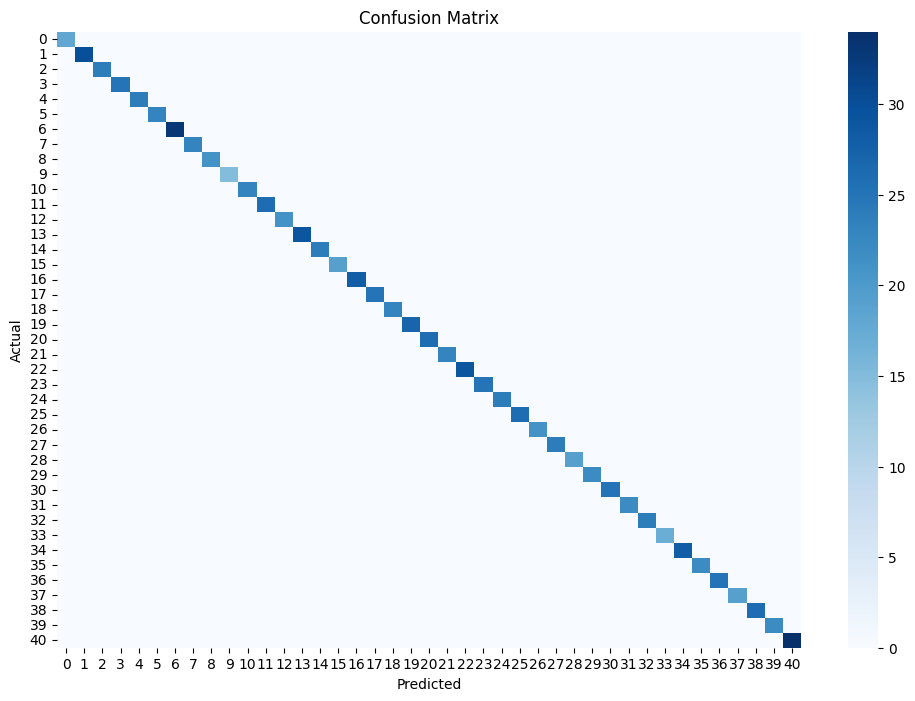

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
                           

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))


In [21]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Namita Sathish\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [22]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Namita Sathish\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [23]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, 
                           out_file=None, 
                           feature_names=symptom_list, 
                           class_names=model.classes_, 
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)  # Save to PNG
graph.view()  # Open the image file



'decision_tree.pdf'

In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Namita Sathish\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Finding the top 20 most infomative symptoms
Here we mean that it helps the model make better decisions about what disease a person might have

C:\Users\Namita Sathish\AppData\Local\Temp\ipykernel_9772\207169156.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_symptoms_df, x='Importance', y='Symptom', palette='viridis')


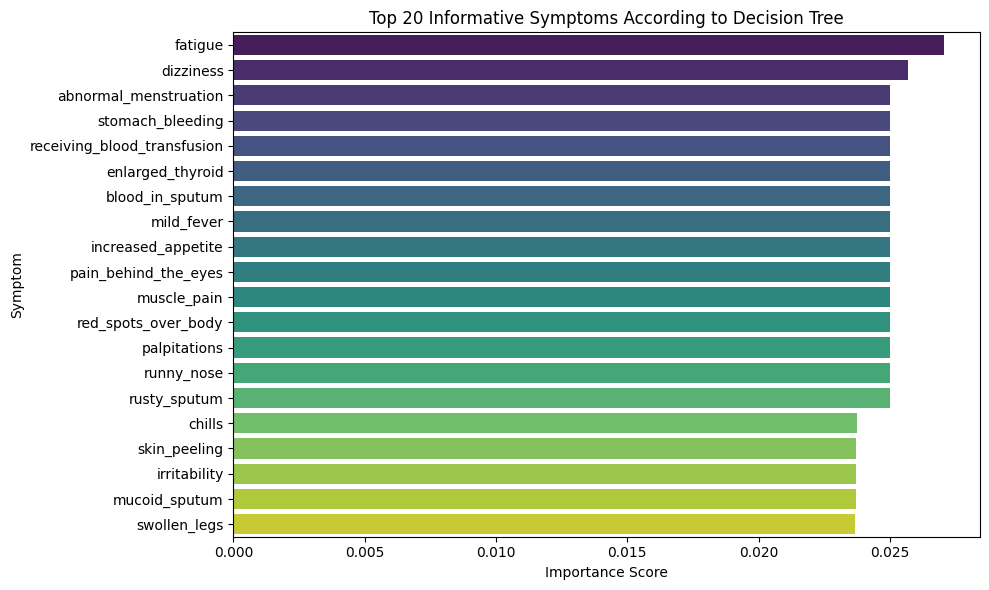

In [ ]:
# Get Feature Importances 
importances = model.feature_importances_

# Combine with symptom names
importance_df = pd.DataFrame({
    'Symptom': symptom_list,
    'Importance': importances
})

# Sort and pick top 20
top_symptoms_df = importance_df.sort_values(by='Importance', ascending=False).head(20)
top_symptoms = top_symptoms_df['Symptom'].tolist()


plt.figure(figsize=(10, 6))
sns.barplot(data=top_symptoms_df, x='Importance', y='Symptom', palette='viridis')
plt.title("Top 20 Informative Symptoms According to Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Symptom")
plt.tight_layout()
plt.show()



Heatmap for the top 20 symptoms

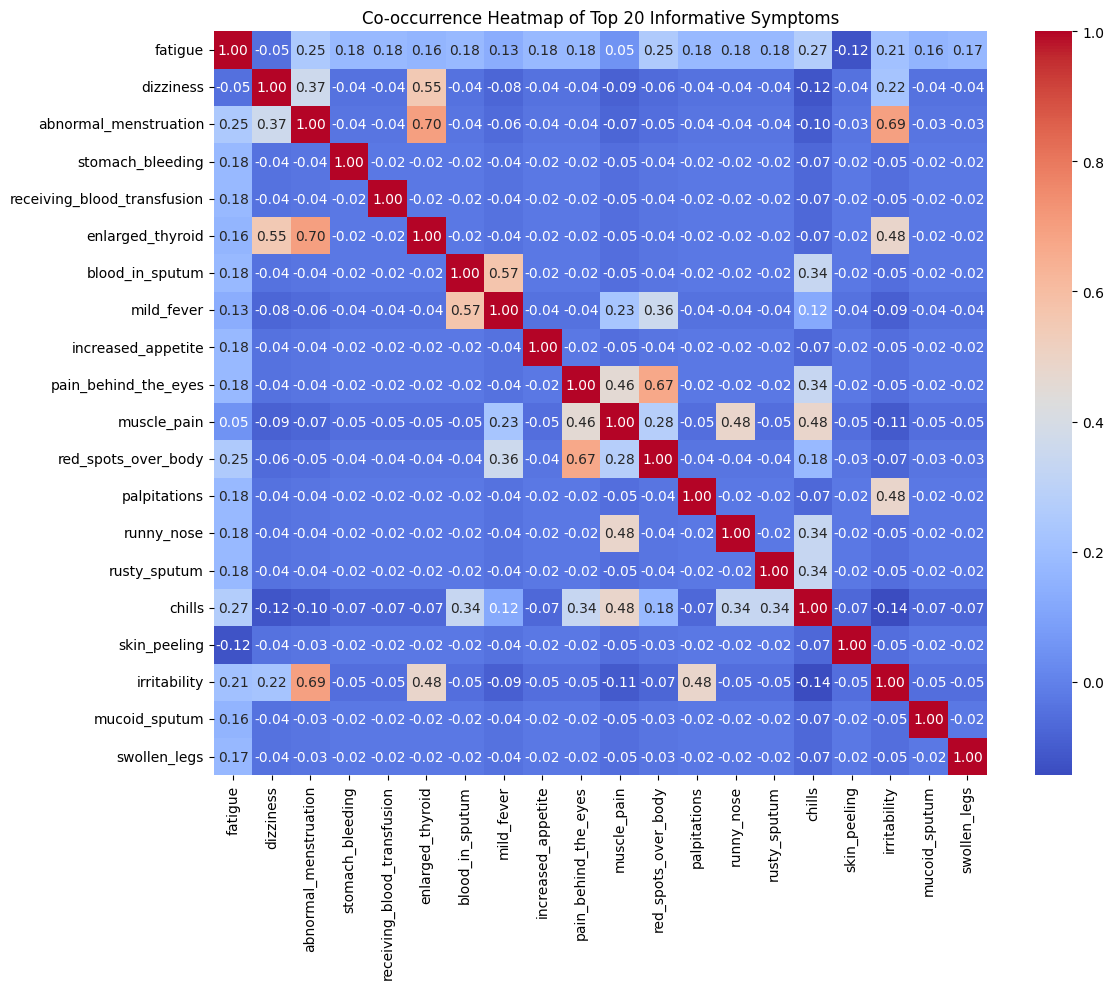

In [ ]:

top_symptom_indices = [symptom_list.index(symptom) for symptom in top_symptoms]

# Extract sub-matrix from binary matrix
binary_matrix = X.copy()
binary_matrix[binary_matrix > 0] = 1

top_symptom_matrix = binary_matrix.iloc[:, top_symptom_indices]
top_correlation_matrix = top_symptom_matrix.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_correlation_matrix, 
            cmap='coolwarm', 
            annot=True, 
            fmt=".2f", 
            xticklabels=top_symptoms, 
            yticklabels=top_symptoms)

plt.title("Co-occurrence Heatmap of Top 20 Informative Symptoms")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [33]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Namita Sathish\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Symptom-Disease Network

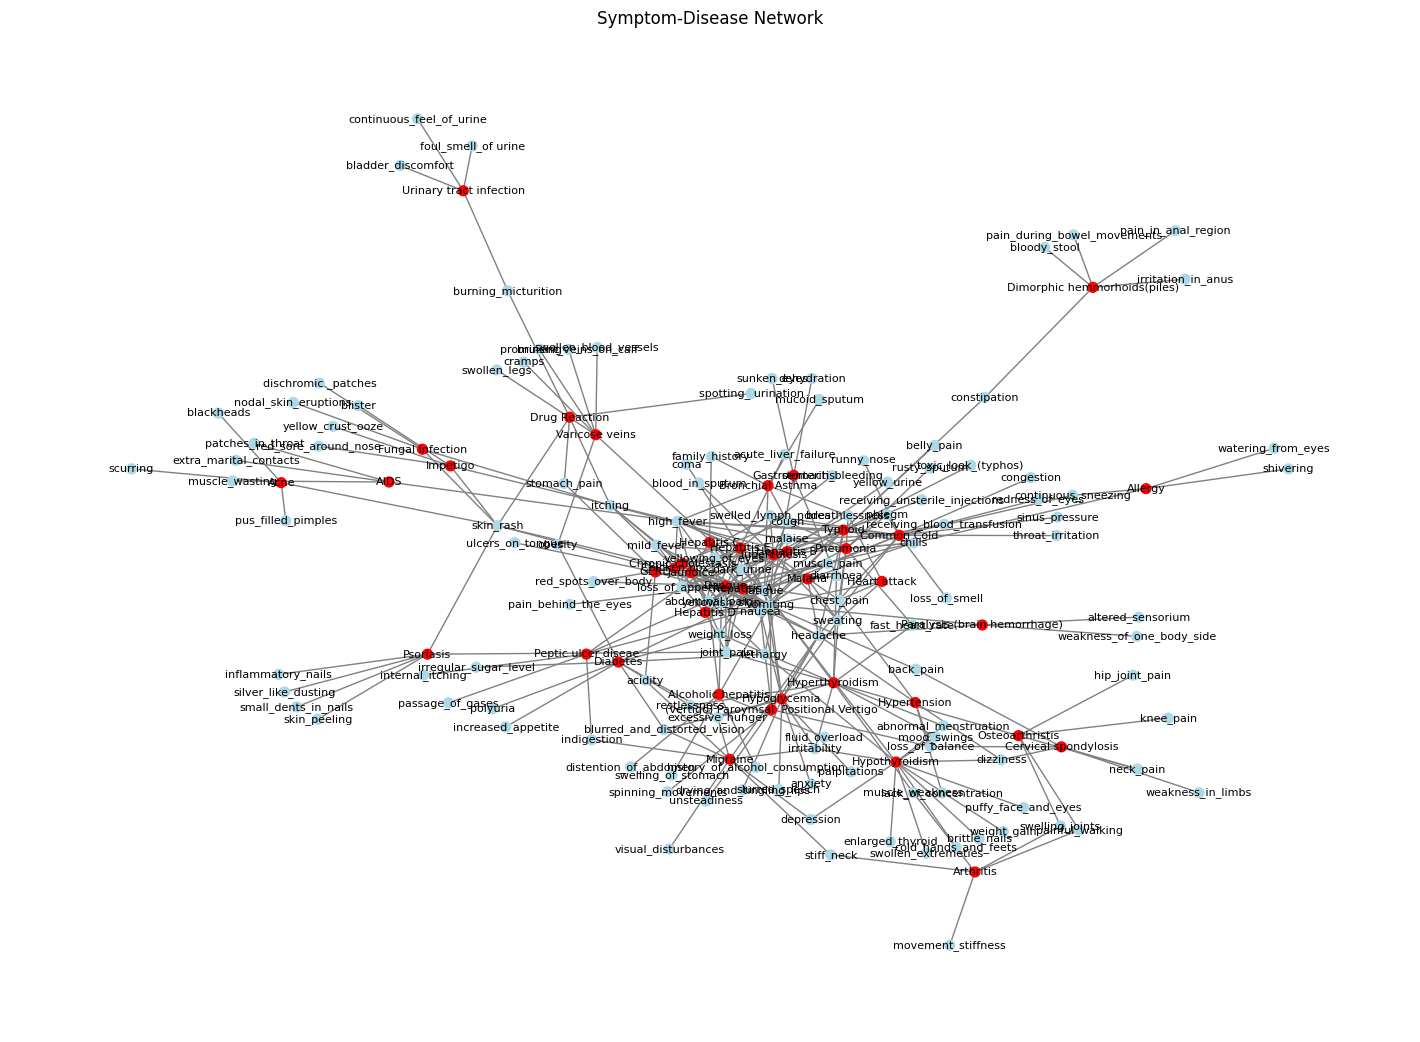

In [34]:
import networkx as nx

G = nx.Graph()

# Add diseases and symptoms as nodes
for _, row in data.iterrows():
    disease = row['Disease']
    for col in symptom_columns:
        symptom = row[col]
        if pd.notnull(symptom):
            symptom = symptom.strip()
            G.add_node(disease, type='disease')
            G.add_node(symptom, type='symptom')
            G.add_edge(disease, symptom)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.15)
node_colors = ['red' if G.nodes[n]['type'] == 'disease' else 'lightblue' for n in G.nodes]
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, node_color=node_colors, edge_color='gray')
plt.title("Symptom-Disease Network")
plt.show()
